In [25]:
#Here I compute the principal components of global OLR dataset and find the 
#spectral density of the first principal component
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


In [26]:
data = pd.read_pickle('final_dataframe.pkl')

In [27]:
data.head() 

,Flattened_olr,Amplitude,MISO1,MISO2,Phase
1998-02-02,"[142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142...",0.271886,0.120646,-0.252943,0
1998-02-03,"[141.4, 141.4, 141.4, 141.4, 141.4, 141.4, 141...",0.318955,0.101532,-0.312871,0
1998-02-04,"[147.05, 147.05, 147.05, 147.05, 147.05, 147.0...",0.356638,0.075671,-0.360043,0
1998-02-05,"[151.65, 151.65, 151.65, 151.65, 151.65, 151.6...",0.460725,0.042925,-0.473440,0
1998-02-06,"[140.95, 140.95, 140.95, 140.95, 140.95, 140.9...",0.465203,0.043117,-0.478062,0


In [28]:
olr =  data.iloc[:,0]
miso1 = data.iloc[:, 2]
miso2 = data.iloc[:, 3] 

In [29]:
olr_columns =pd.DataFrame.from_items(zip(olr.index, olr.values))
olr_columns = olr_columns.T
olr_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,10502,10503,10504,10505,10506,10507,10508,10509,10510,10511
1998-02-02,142.500000,142.500000,142.500000,142.500000,142.500000,142.500000,142.500000,142.500000,142.500000,142.500000,...,151.449997,151.449997,151.449997,151.449997,151.449997,151.449997,151.449997,151.449997,151.449997,151.449997
1998-02-03,141.399994,141.399994,141.399994,141.399994,141.399994,141.399994,141.399994,141.399994,141.399994,141.399994,...,152.050003,152.050003,152.050003,152.050003,152.050003,152.050003,152.050003,152.050003,152.050003,152.050003
1998-02-04,147.050003,147.050003,147.050003,147.050003,147.050003,147.050003,147.050003,147.050003,147.050003,147.050003,...,150.099991,150.099991,150.099991,150.099991,150.099991,150.099991,150.099991,150.099991,150.099991,150.099991
1998-02-05,151.649994,151.649994,151.649994,151.649994,151.649994,151.649994,151.649994,151.649994,151.649994,151.649994,...,148.849991,148.849991,148.849991,148.849991,148.849991,148.849991,148.849991,148.849991,148.849991,148.849991
1998-02-06,140.949997,140.949997,140.949997,140.949997,140.949997,140.949997,140.949997,140.949997,140.949997,140.949997,...,145.959991,145.959991,145.959991,145.959991,145.959991,145.959991,145.959991,145.959991,145.959991,145.959991


In [30]:
# We do not standarize data because all entries are OLR values and we are interested in how 
#they are distributed
pca = PCA(n_components=10) #We create PCA object
pca.fit(olr_columns)
pca_data = pca.transform(olr_columns)

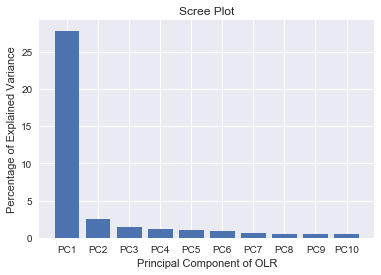

In [31]:
#We calculate the percentage of variation that each principal component accounts for.
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
#Now we create labels for the scree plot. These are "PC1", "PC2", etc (one per principal component)
#A Scree Plot is a simple line segment plot that shows the fraction of total variance in the 
#data as explained or represented by each PC.
labels = ['PC'+ str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x= range(1, len(per_var)+1), height = per_var, tick_label= labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component of OLR')
plt.title('Scree Plot')
plt.show()

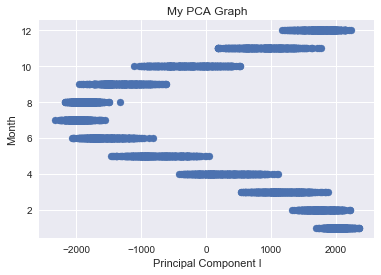

In [32]:
#Now plotting PCA plot, we'll first put the new coordinates, created by pca.transform(scaled.data)
#into a nice matrix where the rows have sample labels and the columns have PC lables
pca_df = pd.DataFrame(pca_data, index = olr_columns.index, columns = labels)

plt.scatter(pca_df.PC1, pca_df.index.month)
plt.title('My PCA Graph')
plt.xlabel('Principal Component I')
plt.ylabel('Month')
plt.show()




In [33]:
from scipy import signal

In [34]:
#Computing and Plotting Power Spectral Density
f, Pxx_den = signal.periodogram(pca_df.PC1)


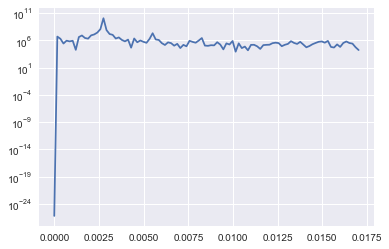

In [35]:
plt.semilogy(f[:100], Pxx_den[:100])
#plt.ylim([10e+1, 10e+9])
plt.show()

In [36]:
index_of_max =Pxx_den.argmax()

In [37]:
highest_frequency = f[index_of_max]

In [40]:
1/highest_frequency
#Hence we can say that the first principal component of global OLR data has frequncy of 363.25 
#(yearly cycle)

363.25

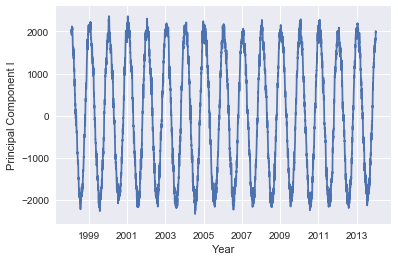

In [39]:
plt.plot(pca_df.PC1)
plt.xlabel('Year')
plt.ylabel('Principal Component I')
plt.show()